Nama: Widad Muhammad Rafi\
NIM: 24/545635/PA/23190

Github: https://github.com/OrangBiasa29/Pengolahan-Citra-Digital

# Import Library





In [1]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Show the Image

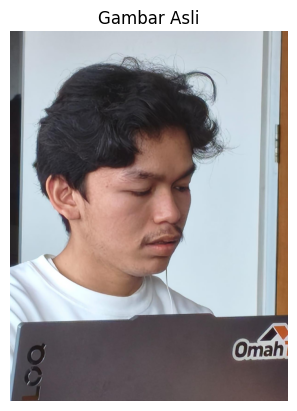

In [6]:
# Convert the  image to jpeg using Pillow
img_asli = Image.open("gambar.jpg")
img_asli.save("gambar.jpeg", "jpeg")

img = cv2.imread("gambar.jpeg")

# mengubah format image yang awalnya BGR (bawaan dari OpenCV) menjadi RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

# Upsampling

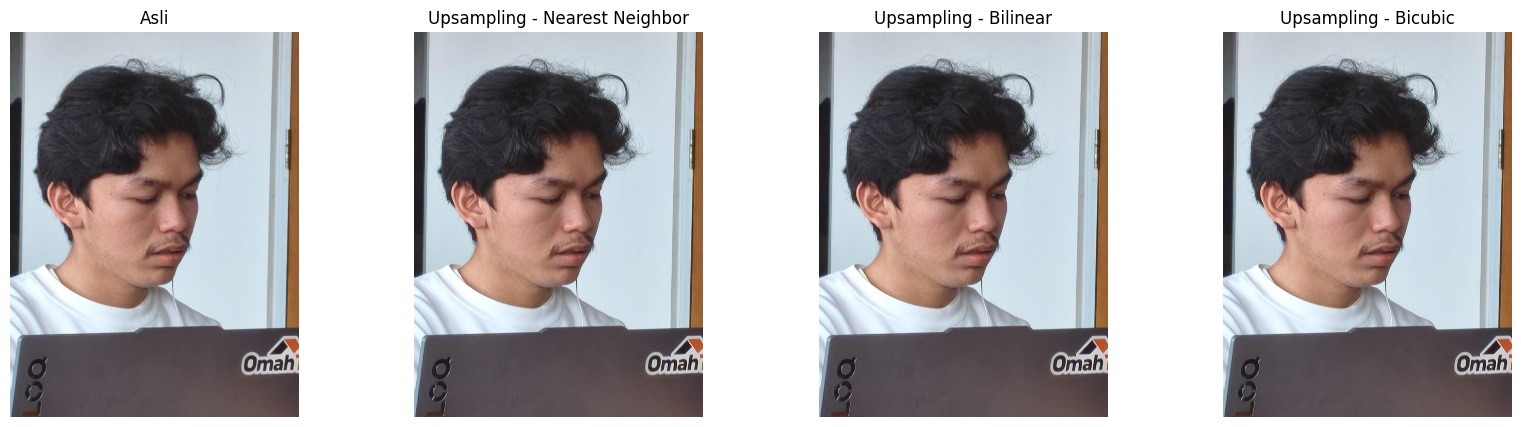

In [3]:
scale_factor = 5

# 1. Nearest Neighbor
up_nearest = cv2.resize(img_rgb, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)

# 2. Bilinear
up_bilinear = cv2.resize(img_rgb, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

# 3. Bicubic
up_bicubic = cv2.resize(img_rgb, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img_rgb)
axs[0].set_title("Asli")
axs[0].axis("off")

axs[1].imshow(up_nearest)
axs[1].set_title("Upsampling - Nearest Neighbor")
axs[1].axis("off")

axs[2].imshow(up_bilinear)
axs[2].set_title("Upsampling - Bilinear")
axs[2].axis("off")

axs[3].imshow(up_bicubic)
axs[3].set_title("Upsampling - Bicubic")
axs[3].axis("off")

plt.show()

Pada gambar di atas, terdapat empat versi citra, yaitu gambar asli, serta hasil upsampling dengan Nearest Neighbor, Bilinear, dan Bicubic. Sekilas memang tidak terlihat perbedaan mencolok, namun jika diamati lebih detail, masing-masing metode memiliki karakteristik sebagai berikut:

### Nearest Neighbor

* Metode ini memperbesar gambar dengan menyalin nilai piksel terdekat.

* Citra yang dihasilkan cenderung terlihat lebih tajam, tetapi pada tepi objek bisa muncul efek "kotak-kotak" (aliasing).

* Cocok untuk gambar dengan pola piksel yang jelas (misalnya ikon, grafis sederhana), tetapi kurang baik untuk foto karena bisa menimbulkan kesan kasar.

### Bilinear

* Metode ini menghitung nilai piksel baru berdasarkan rata-rata bobot dari empat piksel tetangga terdekat.

* Hasil citra lebih halus dibanding Nearest Neighbor, dengan transisi warna yang lebih mulus.

* Namun, efek halus ini terkadang membuat gambar terlihat sedikit blur, terutama pada detail kecil seperti tekstur rambut atau tepi objek.

### Bicubic

* Metode ini menggunakan interpolasi dengan 16 piksel tetangga terdekat (lebih kompleks daripada bilinear).

* Hasilnya lebih tajam dan halus secara bersamaan dibanding bilinear, sehingga detail wajah dan rambut tetap terjaga dengan baik.

* Biasanya dianggap metode terbaik untuk foto karena mampu menjaga detail sekaligus mengurangi artefak.

# Downsampling

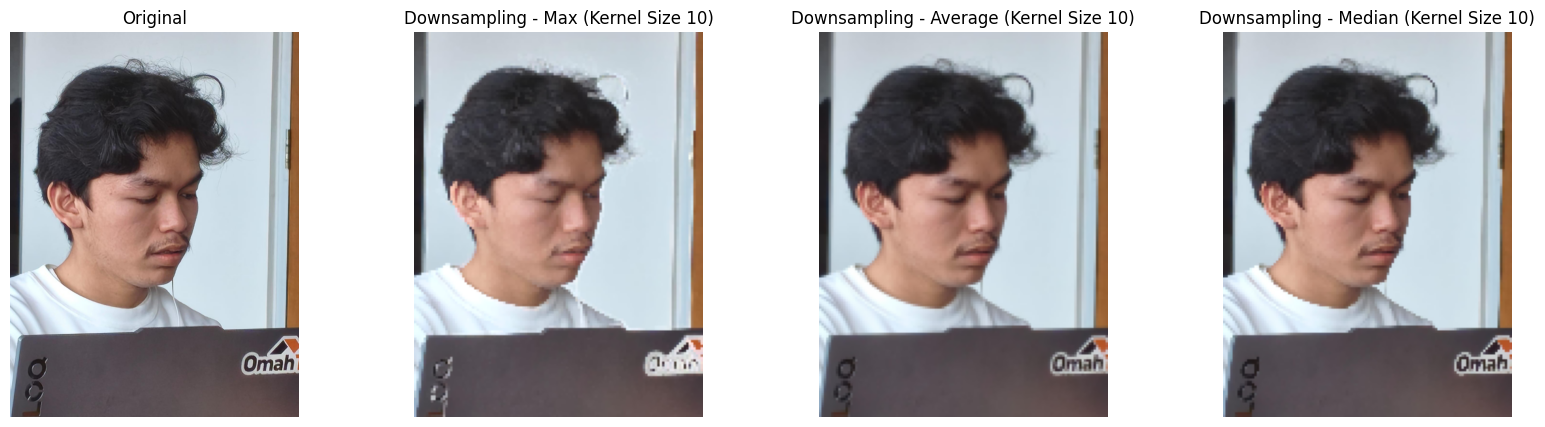

In [4]:
kernel_size = 10

# Max pooling
def downsample_max(img, kernel_size):
    output = np.zeros((img.shape[0] // kernel_size, img.shape[1] // kernel_size, img.shape[2]), dtype=img.dtype)
    for i in range(0, img.shape[0] - kernel_size + 1, kernel_size):
        for j in range(0, img.shape[1] - kernel_size + 1, kernel_size):
            output[i // kernel_size, j // kernel_size] = np.max(img[i:i+kernel_size, j:j+kernel_size], axis=(0, 1))
    return output

# Average pooling
def downsample_average(img, kernel_size):
    output = np.zeros((img.shape[0] // kernel_size, img.shape[1] // kernel_size, img.shape[2]), dtype=img.dtype)
    for i in range(0, img.shape[0] - kernel_size + 1, kernel_size):
        for j in range(0, img.shape[1] - kernel_size + 1, kernel_size):
            output[i // kernel_size, j // kernel_size] = np.mean(img[i:i+kernel_size, j:j+kernel_size], axis=(0, 1))
    return output

# Median pooling
def downsample_median(img, kernel_size):
    output = np.zeros((img.shape[0] // kernel_size, img.shape[1] // kernel_size, img.shape[2]), dtype=img.dtype)
    for i in range(0, img.shape[0] - kernel_size + 1, kernel_size):
        for j in range(0, img.shape[1] - kernel_size + 1, kernel_size):
            output[i // kernel_size, j // kernel_size] = np.median(img[i:i+kernel_size, j:j+kernel_size], axis=(0, 1))
    return output


# Apply downsampling
downsampled_max = downsample_max(img_rgb, kernel_size)
downsampled_average = downsample_average(img_rgb, kernel_size)
downsampled_median = downsample_median(img_rgb, kernel_size)


fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img_rgb)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(downsampled_max.astype(np.uint8)) # Convert back to uint8 for display
axs[1].set_title(f"Downsampling - Max (Kernel Size {kernel_size})")
axs[1].axis("off")

axs[2].imshow(downsampled_average.astype(np.uint8)) # Convert back to uint8 for display
axs[2].set_title(f"Downsampling - Average (Kernel Size {kernel_size})")
axs[2].axis("off")

axs[3].imshow(downsampled_median.astype(np.uint8)) # Convert back to uint8 for display
axs[3].set_title(f"Downsampling - Median (Kernel Size {kernel_size})")
axs[3].axis("off")

plt.show()

Gambar di atas menampilkan perbandingan antara citra asli dan hasil downsampling menggunakan tiga pendekatan berbeda. Meskipun sama-sama bertujuan mereduksi ukuran atau informasi, setiap metode menghasilkan karakteristik visual yang berbeda:

### Downsampling - Max

* Mengambil nilai piksel maksimum dalam setiap kernel.

* Citra yang dihasilkan cenderung terlihat lebih tajam pada area terang, karena nilai maksimum mendominasi.

* Namun, detail halus sering hilang dan kontras antar area bisa tampak lebih keras. Misalnya, rambut tampak lebih gelap pekat sementara area wajah tampak lebih terang.

### Downsampling - Average

* Menghitung rata-rata intensitas piksel dalam kernel.

* Hasil citra terlihat paling halus dan natural, dengan transisi antar area yang lembut.

* Kekurangannya, detail menjadi lebih blur karena rata-rata "meratakan" perbedaan intensitas. Ini terlihat pada bagian rambut yang kehilangan ketajaman.

### Downsampling - Median

* Mengambil nilai median dari piksel dalam kernel.

* Hasil citra terlihat seimbang antara ketajaman dan penghilangan noise.

* Median efektif untuk mereduksi outlier (piksel terlalu terang/gelap yang tidak representatif), sehingga tekstur wajah dan rambut tetap cukup jelas dibanding average, namun tidak sekontras metode max.